*Tre's notebook*
# Criminal Activity Reports
### The dataset used in this notebook covers monthly reported criminal activity

In [69]:
import pandas as pd

crim_data = pd.read_csv('criminalactivity.csv')
crim = crim_data[['ReportedDate', 'ReportedMonth', 'NIBRS_Offense_Type', 'NIBRS_Offense_Grouping', 'Zone', 'Neighborhood']]
crim.sample(5)

/scratch/slurm-22259/ipykernel_1541499/4083541778.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crim_data = pd.read_csv('criminalactivity.csv')


,ReportedDate,ReportedMonth,NIBRS_Offense_Type,NIBRS_Offense_Grouping,Zone,Neighborhood
69941,2025-08-07,Aug,Not NIBRS Reportable,B,Zone 5,East Liberty
67183,2025-10-13,Oct,Not NIBRS Reportable,B,Zone 3,South Side Flats
58709,2025-07-02,Jul,Intimidation,A,Zone 3,NaN
51931,2025-05-07,May,Not NIBRS Reportable,B,Zone 2,Lower Lawrenceville
22780,2024-08-08,Aug,Shoplifting,A,Zone 3,Carrick


*  Here are the 10 neighborhoods with the highest crime reports

<Axes: xlabel='Neighborhood'>

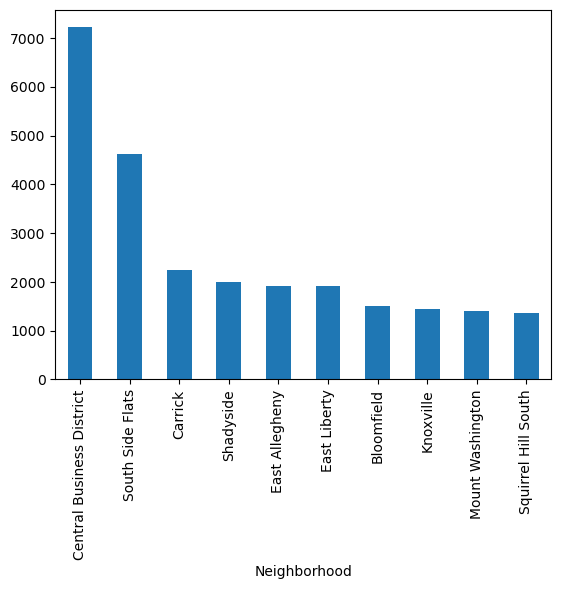

In [60]:
highest_crim = crim['Neighborhood'].value_counts().head(10)
highest_crim.plot(kind='bar')

In [67]:
print(highest_crim)

Neighborhood
Central Business District    7218
South Side Flats             4631
Carrick                      2242
Shadyside                    1993
East Allegheny               1917
East Liberty                 1913
Bloomfield                   1498
Knoxville                    1444
Mount Washington             1401
Squirrel Hill South          1352
Name: count, dtype: int64


*  Here are the neighborhoods with the lowest crime reports

<Axes: xlabel='Neighborhood'>

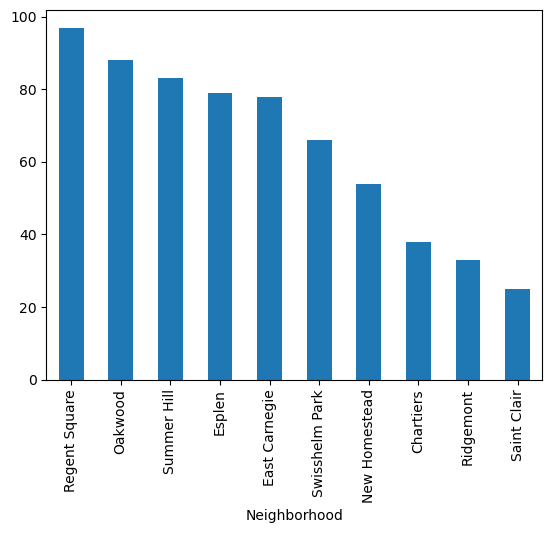

In [61]:
lowest_crim = crim['Neighborhood'].value_counts().tail(10)
lowest_crim.plot(kind='bar')

In [66]:
print(lowest_crim)

Neighborhood
Regent Square     97
Oakwood           88
Summer Hill       83
Esplen            79
East Carnegie     78
Swisshelm Park    66
New Homestead     54
Chartiers         38
Ridgemont         33
Saint Clair       25
Name: count, dtype: int64


**These are just raw numbers**

**Now we will observe the offense grouping**

    Put Simply:
*  Group A is considered *"major"* crimes such as robbery and assault
*  Group B is considered *"minor"* crimes such as loitering and tresspassing

In [78]:
crim_grouping = crim['NIBRS_Offense_Grouping']

*  Here are the top 10 highest and lowest "A" Offenses

<Axes: xlabel='Neighborhood'>

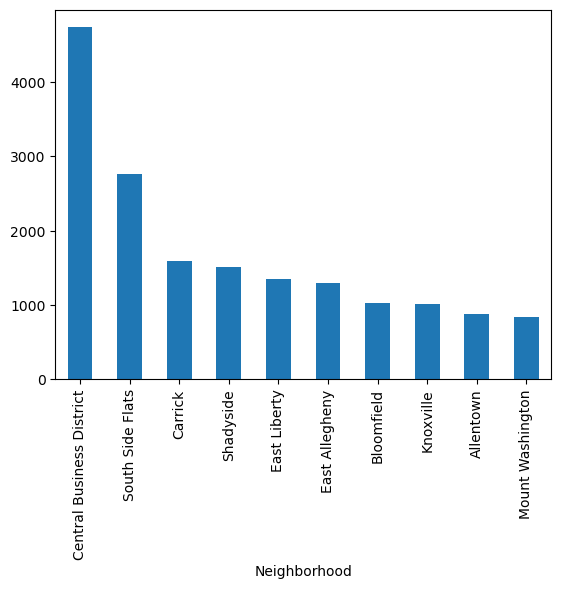

In [80]:
group_A = crim[crim_grouping == 'A']
A_counts = group_A['Neighborhood'].value_counts()
A_counts.head(10).plot(kind="bar")

<Axes: xlabel='Neighborhood'>

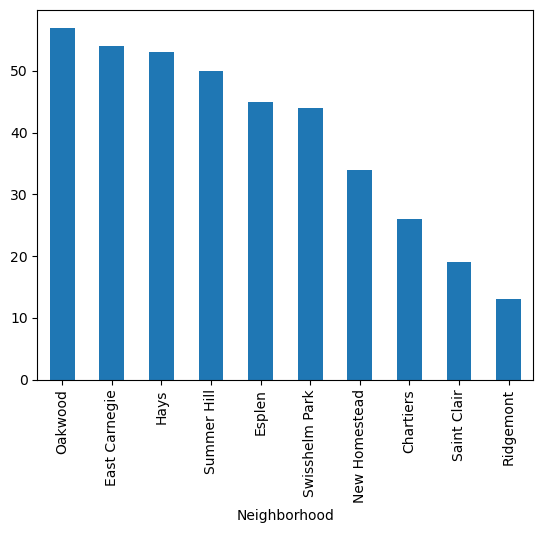

In [86]:
A_counts.tail(10).plot(kind="bar")

*  Here are the top 10 highest and lowest "B" Offenses

<Axes: xlabel='Neighborhood'>

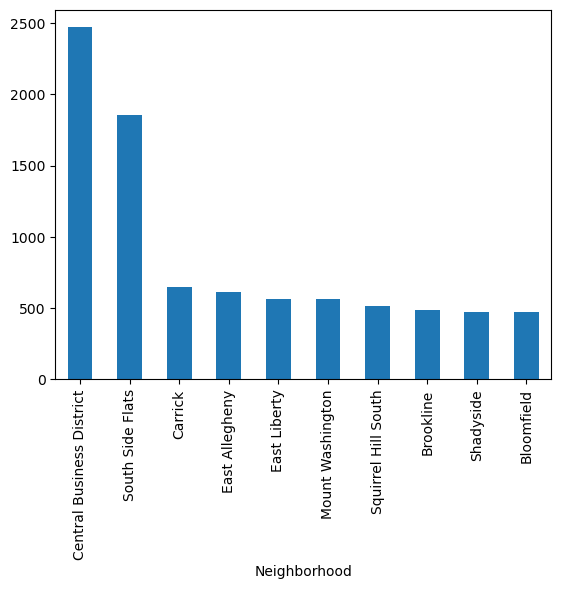

In [85]:
group_B = crim[crim_grouping == 'B']
B_counts = group_B['Neighborhood'].value_counts()
B_counts.head(10).plot(kind="bar")

<Axes: xlabel='Neighborhood'>

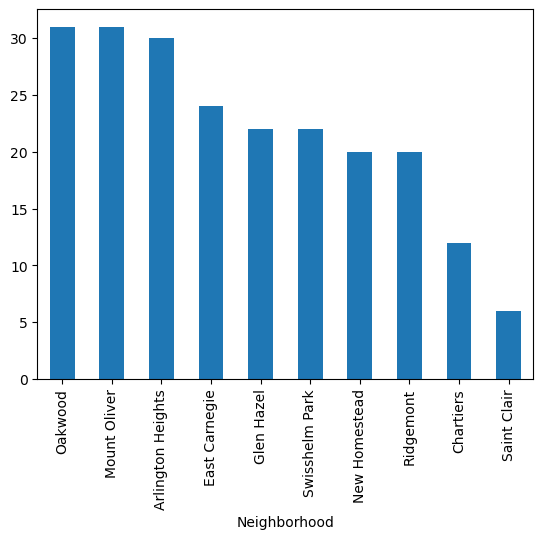

In [87]:
B_counts.tail(10).plot(kind="bar")